1. llamaindex framework
2. Lancedb
3. LLM model(GPT-4V)
4. GEMINI-PRO-VISION

Steps:
1. Download video from YouTube, process and store it.

2. Build Multi-Modal index and vector store for both texts and images.

3. Retrieve relevant images and context, use both to augment the prompt.

4. Using GPT4V for reasoning the correlations between the input query and augmented data and generating final response.

In [29]:
%pip install llama-index-llms-gemini
!pip install -q llama-index google-generativeai
%pip install llama-index-vector-stores-qdrant llama-index-readers-file llama-index-embeddings-fastembed llama-index-llms-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.1/679.1 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: pillow
    Found existing installat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.2/180.2 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 4.9 MB/s eta 0:00:00
   ━━━━

In [30]:
%pip install llama-index-vector-stores-lancedb
%pip install llama-index-multi-modal-llms-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.5/28.5 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 6.5 MB/s eta 0:00:00


In [31]:
#%pip install llama-index-multi-modal-llms-openai
#%pip install llama-index-vector-stores-lancedb
%pip install llama-index-embeddings-clip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166

In [32]:
!pip install llama-index-embeddings-huggingface
!pip install llama-index-embeddings-langchain
!pip install langchain langchain-community
%pip install llama-index-embeddings-gemini
!pip install llama-index 'google-generativeai>=0.3.0' matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 853.2/853.2 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.9/394.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.1/149.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.27.3
    Uninstalling protobuf-5.27.3:
      Successfully uninstalled protobuf-5.27.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavio

In [33]:
%pip install llama_index ftfy regex tqdm
%pip install -U openai-whisper
%pip install git+https://github.com/openai/CLIP.git
%pip install torch torchvision
%pip install matplotlib scikit-image
%pip install lancedb
%pip install moviepy
%pip install pytube
%pip install pydub
%pip install SpeechRecognition
%pip install ffmpeg-python
%pip install soundfile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 10.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai-whisper: filename=openai_whisper-20231117-py3-none-any.whl size=801360 sha256=9abdbf4d397a9791176d45fbdd0a1c807b200c75e54ee258c3821ff100f42dba
  Stored in directory: /root/.cache/pip/wheels/d0/85/e1/9361b4cbea7dd4b7f6702fa4c3afc94877952eeb2b62f45f56
Successfully built openai-whisper
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-r5ri49_o
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-r5ri49_o
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=4759de6c181925f1ffcb56dc27b33505d41d3bdd34b8546eaac5a127a4

In [85]:
!pip install llama-index-readers-file

In [118]:
%pip install llama-index-multi-modal-llms-gemini

In [49]:
!pip install pytubefix

In [50]:
from moviepy.editor import VideoFileClip
from pathlib import Path
import speech_recognition as sr
from pytubefix import YouTube
from pprint import pprint

In [51]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

In [52]:
import os
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [53]:
from PIL import Image
import matplotlib.pyplot as plt

In [54]:
import os
os.getcwd()

'/content'

In [55]:
video_url="https://www.youtube.com/watch?v=3dhcmeOTZ_Q"
output_video_path = "/content/video_data/"
output_folder = "/content/mixed_data/"
output_audio_path = "/content/mixed_data/output_audio.wav"

In [56]:
filepath=output_video_path + "input_vid.mp4"

In [57]:
filepath

'/content/video_data/input_vid.mp4'

In [60]:
import matplotlib.pyplot as plt

In [61]:
def plot_images(images_path):
  images_shown = 0
  plt.figure(figsize=(16, 9))
  for img_path in images_path:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 5:
                break


In [62]:
from pytubefix import YouTube
def download_video(url,output_path):
  yt = YouTube(url)
  metadata = {"Author": yt.author, "Title": yt.title, "Views": yt.views}
  yt.streams.get_highest_resolution().download(
        output_path=output_path, filename="input_vid.mp4"
    )
  return metadata

In [63]:
from moviepy.editor import VideoFileClip
def video_to_images(video_path,output_flder):
  clip=VideoFileClip(video_path)
  clip.write_images_sequence(
      os.path.join(output_folder,"frame%04d.png"),fps=0.2
  )

In [64]:
def video_to_audio(video_path,output_audio_path):
  clip=VideoFileClip(video_path)
  audio=clip.audio
  audio.write_audiofile(output_audio_path)


In [65]:
def audio_to_text(audio_path):
  recognizer=sr.Recognizer()
  audio=sr.AudioFile(audio_path)

  with audio as source:
    audio_data=recognizer.record(source)

    try:

      #recognize the speech
      text = recognizer.recognize_whisper(audio_data)

    except sr.UnknownValueError:
      print("Speech recognition could not understand the audio.")
  return text



In [66]:
video_url

'https://www.youtube.com/watch?v=3dhcmeOTZ_Q'

In [67]:
output_video_path

'/content/video_data/'

In [68]:
metadata_vid = download_video(video_url, output_video_path)

In [69]:
metadata_vid

{'Author': '3-Minute Data Science',
 'Title': 'Linear Regression in 3 Minutes',
 'Views': 9289}

In [70]:
filepath

'/content/video_data/input_vid.mp4'

In [71]:
output_folder

'/content/mixed_data/'

In [72]:
!mkdir mixed_data

mkdir: cannot create directory ‘mixed_data’: File exists


In [73]:
filepath

'/content/video_data/input_vid.mp4'

In [74]:
output_folder

'/content/mixed_data/'

In [75]:
video_to_images(filepath,output_folder)

Moviepy - Writing frames /content/mixed_data/frame%04d.png.


Moviepy - Done writing frames /content/mixed_data/frame%04d.png.


In [76]:
filepath

'/content/video_data/input_vid.mp4'

In [77]:
output_audio_path

'/content/mixed_data/output_audio.wav'

In [78]:
video_to_audio(filepath,output_audio_path)

MoviePy - Writing audio in /content/mixed_data/output_audio.wav


MoviePy - Done.


In [79]:
output_audio_path

'/content/mixed_data/output_audio.wav'

In [80]:
text_data=audio_to_text(output_audio_path)

100%|███████████████████████████████████████| 139M/139M [00:01<00:00, 85.9MiB/s]


In [81]:
text_data

" Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear re

In [82]:
with open(output_folder + "output_text.txt", "w") as file:
        file.write(text_data)
print("Text data saved to file")
file.close()




Text data saved to file


In [83]:
os.remove(output_audio_path)
print("Audio file removed")

Audio file removed


In [84]:
# embedding lance db
# llm

In [86]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.core import SimpleDirectoryReader
from llama_index.core import StorageContext

In [87]:
from llama_index.vector_stores.lancedb import LanceDBVectorStore

In [88]:
text_store=LanceDBVectorStore(uri="lancedb",table_name="text_collection")
image_store=LanceDBVectorStore(uri="lancedb",table_name="image_collection")

In [89]:
storage_context=StorageContext.from_defaults(vector_store=text_store,image_store=image_store)

In [90]:
output_folder

'/content/mixed_data/'

In [91]:
documents=SimpleDirectoryReader(output_folder).load_data()

In [92]:
documents

[ImageDocument(id_='7cbd9dce-9683-46cc-b16e-e4c680e03c5e', embedding=None, metadata={'file_path': '/content/mixed_data/frame0000.png', 'file_name': 'frame0000.png', 'file_type': 'image/png', 'file_size': 750, 'creation_date': '2024-08-26', 'last_modified_date': '2024-08-26'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='', mimetype='text/plain', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n', image=None, image_path='/content/mixed_data/frame0000.png', image_url=None, image_mimetype=None, text_embedding=None),
 ImageDocument(id_='f4b82f2a-1ff7-4566-bbb4-694be48d7fba', embedding=None, metadata={'file_path': '/content/mixed_data/frame0001.png', 'file_name': 

In [93]:
from llama_index.core import VectorStoreIndex, StorageContext
from llama_index.embeddings.gemini import GeminiEmbedding
from llama_index.llms.gemini import Gemini
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import Settings
from llama_index.core import StorageContext
import qdrant_client

In [94]:
# Using the embedding model to Gemini
Settings.embed_model = GeminiEmbedding(
    model_name="models/embedding-001", api_key=GOOGLE_API_KEY
)

In [95]:
index = MultiModalVectorStoreIndex.from_documents(documents,storage_context=storage_context)

100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 66.6MiB/s]


In [96]:
retriever_engine=index.as_retriever(similarity_top_k=5, image_similarity_top_k=5)

# RAG

In [97]:
import json
metadata_str=json.dumps(metadata_vid)

In [98]:
qa_tmpl_str=(
    "Given the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Context: {context_str}\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [100]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

In [101]:
query_str="what is a O'Reilly platform.?"

In [102]:
retrieval_results=retriever_engine.retrieve(query_str)

In [103]:
retrieval_results

[NodeWithScore(node=TextNode(id_='7d57b9a7-c01d-4c5b-a494-a96899767a55', embedding=[-0.009323928505182266, -0.06393878906965256, 0.03396126627922058, 0.002393315313383937, 0.11101123690605164, 0.027791813015937805, -0.016461413353681564, -0.05380430072546005, 0.022651106119155884, -0.004899463150650263, -0.0041336980648338795, 0.012769863940775394, -0.02211720310151577, -0.02604084275662899, 0.012338047847151756, -0.014119819737970829, 0.0012790538603439927, 0.006695888005197048, 0.02870108187198639, -0.011219014413654804, 0.03112432174384594, -0.0029009487479925156, -0.012592590413987637, -0.019369054585695267, 0.024656713008880615, 0.0258688572794199, 0.03383481875061989, -0.06248893961310387, -0.026099706068634987, 0.06885721534490585, -0.028169605880975723, -0.0028763774316757917, -0.010867945849895477, -0.0037843903992325068, 0.01758304052054882, -0.03171568736433983, 0.03428954631090164, 0.003327511716634035, 0.021677708253264427, -0.0019060298800468445, 0.008692394942045212, 0.0

In [104]:
retrieved_image=[]
retrieved_text=[]

In [105]:
for res_node in retrieval_results:
  if isinstance(res_node.node,ImageNode):
    retrieved_image.append(res_node.node.metadata["file_path"])
  else:
     display_source_node(res_node, source_length=200)
     retrieved_text.append(res_node.text)




**Node ID:** 7d57b9a7-c01d-4c5b-a494-a96899767a55<br>**Similarity:** 0.38666248321533203<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [106]:
retrieved_image

['/content/mixed_data/frame0041.png',
 '/content/mixed_data/frame0045.png',
 '/content/mixed_data/frame0040.png',
 '/content/mixed_data/frame0044.png',
 '/content/mixed_data/frame0042.png']

In [107]:
retrieved_text

["Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear re

In [108]:
def retrieve(retriever_engine, query_str):
    retrieval_results = retriever_engine.retrieve(query_str)

    retrieved_image = []
    retrieved_text = []
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_image.append(res_node.node.metadata["file_path"])
        else:
            display_source_node(res_node, source_length=200)
            retrieved_text.append(res_node.text)

    return retrieved_image, retrieved_text

In [109]:
img, txt = retrieve(retriever_engine=retriever_engine, query_str=query_str)

**Node ID:** 7d57b9a7-c01d-4c5b-a494-a96899767a55<br>**Similarity:** 0.38666248321533203<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [110]:
output_folder

'/content/mixed_data/'

In [111]:
img

['/content/mixed_data/frame0041.png',
 '/content/mixed_data/frame0045.png',
 '/content/mixed_data/frame0040.png',
 '/content/mixed_data/frame0044.png',
 '/content/mixed_data/frame0042.png']

In [112]:
image_documents = SimpleDirectoryReader(input_dir=output_folder, input_files=img).load_data()

In [114]:
context_str = "".join(txt)

In [115]:
context_str

"Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear reg

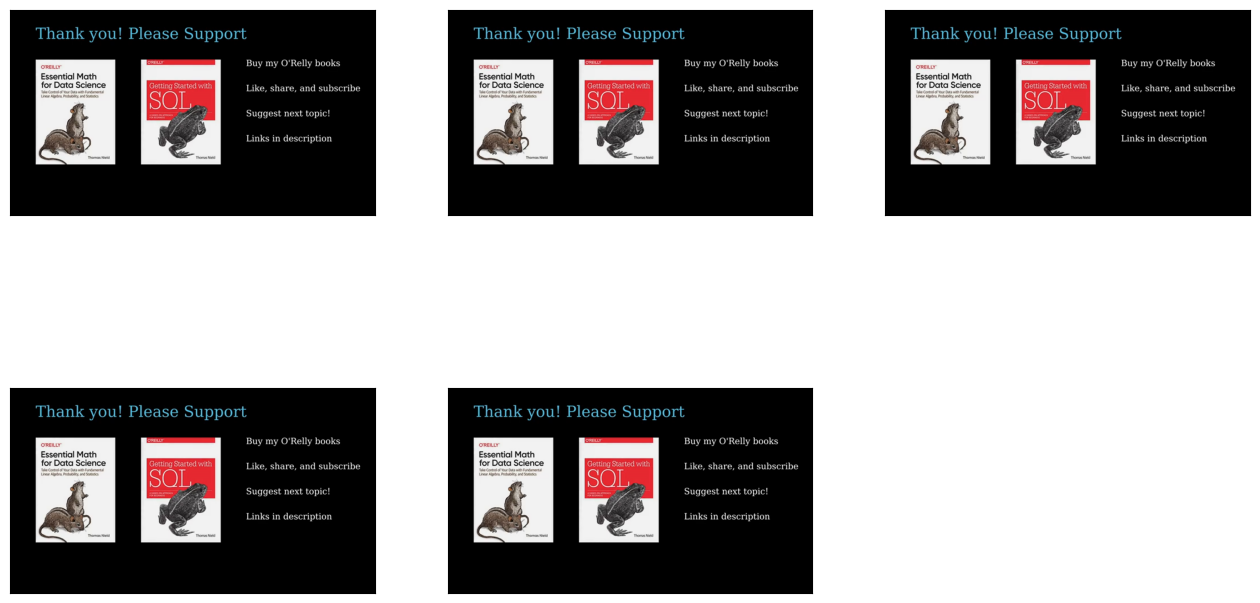

In [116]:
plot_images(img)

In [119]:
from llama_index.multi_modal_llms.gemini import GeminiMultiModal


You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(



In [122]:
gemini_mm_llm = GeminiMultiModal(model_name="models/gemini-1.5-flash", api_key=GOOGLE_API_KEY, max_new_tokens=1500)

In [123]:
result=gemini_mm_llm.complete(
    prompt=qa_tmpl_str.format(
        context_str=context_str,query_str=query_str,metadata_str=metadata_str
    ),
    image_documents=image_documents,
)

In [124]:
pprint(result.text)

("O'Reilly is a publishing company that specializes in books and online "
 'learning resources for technology and business professionals.')


In [127]:
query_str="Give me equation of multiple and simple Linear Regression?"

In [128]:
img, txt = retrieve(retriever_engine=retriever_engine, query_str=query_str)

**Node ID:** 7d57b9a7-c01d-4c5b-a494-a96899767a55<br>**Similarity:** 0.45050549507141113<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [129]:
output_folder

'/content/mixed_data/'

In [130]:
img

['/content/mixed_data/frame0003.png',
 '/content/mixed_data/frame0038.png',
 '/content/mixed_data/frame0027.png',
 '/content/mixed_data/frame0028.png',
 '/content/mixed_data/frame0015.png']

In [131]:
image_documents = SimpleDirectoryReader(input_dir=output_folder, input_files=img).load_data()

context_str = "".join(txt)
context_str

"Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear reg

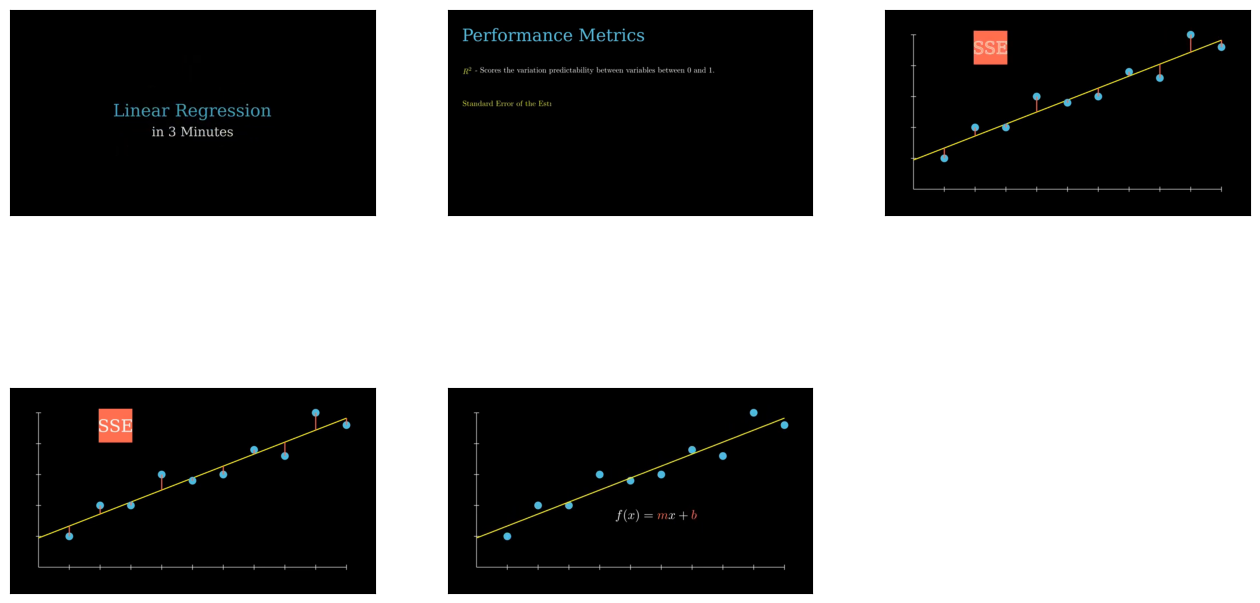

In [132]:
plot_images(img)

In [133]:
result=gemini_mm_llm.complete(
    prompt=qa_tmpl_str.format(
        context_str=context_str,query_str=query_str,metadata_str=metadata_str
    ),
    image_documents=image_documents,
)

In [134]:
pprint(result.text)

('The equation for simple linear regression is: y = mx + b, where y is the '
 'output variable, x is the input variable, m is the slope of the line, and b '
 'is the intercept of the line.\n'
 '\n'
 'The equation for multiple linear regression is: y = b0 + b1x1 + b2x2 + ... + '
 'bnxn, where y is the output variable, x1, x2, ..., xn are the input '
 'variables, b0 is the intercept of the line, and b1, b2, ..., bn are the '
 'slopes of the line for each input variable.')


In [138]:
query_str="what is a Linear Regression and it's Equation?"

In [139]:
img, txt = retrieve(retriever_engine=retriever_engine, query_str=query_str)

**Node ID:** 7d57b9a7-c01d-4c5b-a494-a96899767a55<br>**Similarity:** 0.5071461200714111<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [140]:
output_folder

'/content/mixed_data/'

In [141]:
img

['/content/mixed_data/frame0003.png',
 '/content/mixed_data/frame0038.png',
 '/content/mixed_data/frame0027.png',
 '/content/mixed_data/frame0015.png',
 '/content/mixed_data/frame0028.png']

In [142]:
image_documents2 = SimpleDirectoryReader(input_files=img).load_data()
context_str = "".join(txt)
context_str

"Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear reg

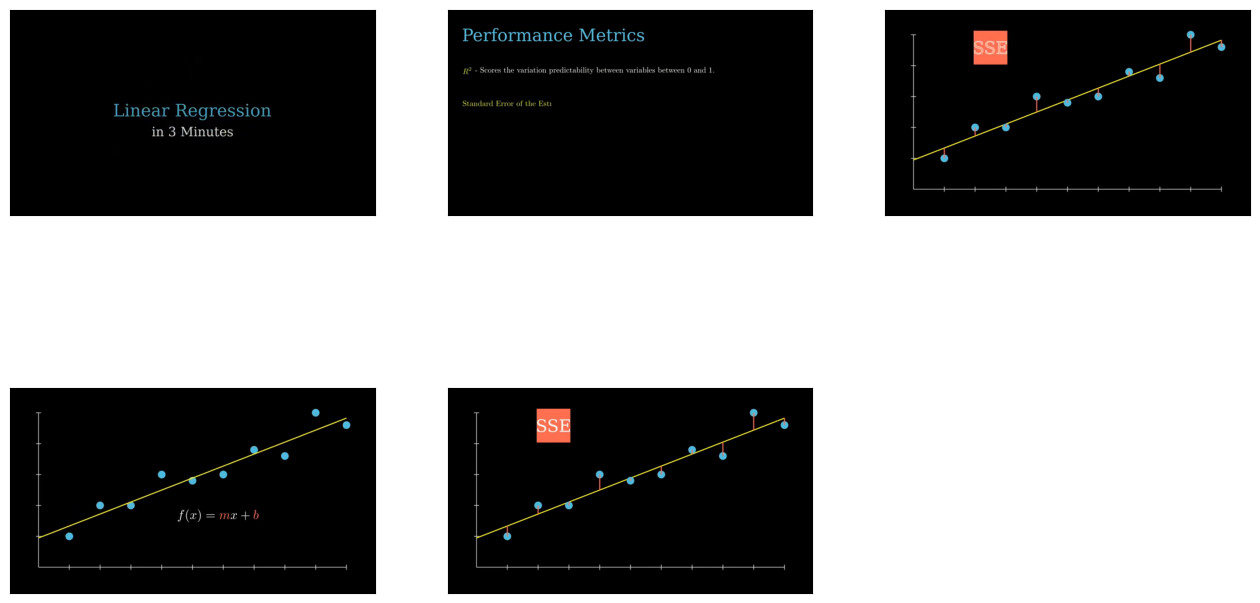

In [143]:
plot_images(img)

In [144]:
result=gemini_mm_llm.complete(
    prompt=qa_tmpl_str.format(
        context_str=context_str,query_str=query_str,metadata_str=metadata_str
    ),
    image_documents=image_documents2,
)

pprint(result.text)

('Linear regression is a statistical technique for modeling the relationship '
 'between an output variable and one or more input variables. The equation for '
 'linear regression is y = mx + b, where y is the output variable, x is the '
 'input variable, m is the slope of the line, and b is the intercept of the '
 'line.')


In [145]:
qa_tmpl_str2=(
    "Given the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [136]:
qa_tmpl_str2

'Given the provided information, including relevant images and retrieved context from the video,     accurately and precisely answer the query without any additional prior knowledge.\n---------------------\nMetadata for video: {metadata_str} \n---------------------\nQuery: {query_str}\nAnswer: '

In [146]:
query_str="what is a Linear Regression and it's Equation?"

In [147]:
img, txt = retrieve(retriever_engine=retriever_engine, query_str=query_str)

**Node ID:** 7d57b9a7-c01d-4c5b-a494-a96899767a55<br>**Similarity:** 0.5071461200714111<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [148]:
output_folder

'/content/mixed_data/'

In [149]:
img

['/content/mixed_data/frame0003.png',
 '/content/mixed_data/frame0038.png',
 '/content/mixed_data/frame0027.png',
 '/content/mixed_data/frame0015.png',
 '/content/mixed_data/frame0028.png']

In [150]:
image_documents2 = SimpleDirectoryReader(input_files=img).load_data()

context_str = "".join(txt)
context_str

"Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear reg

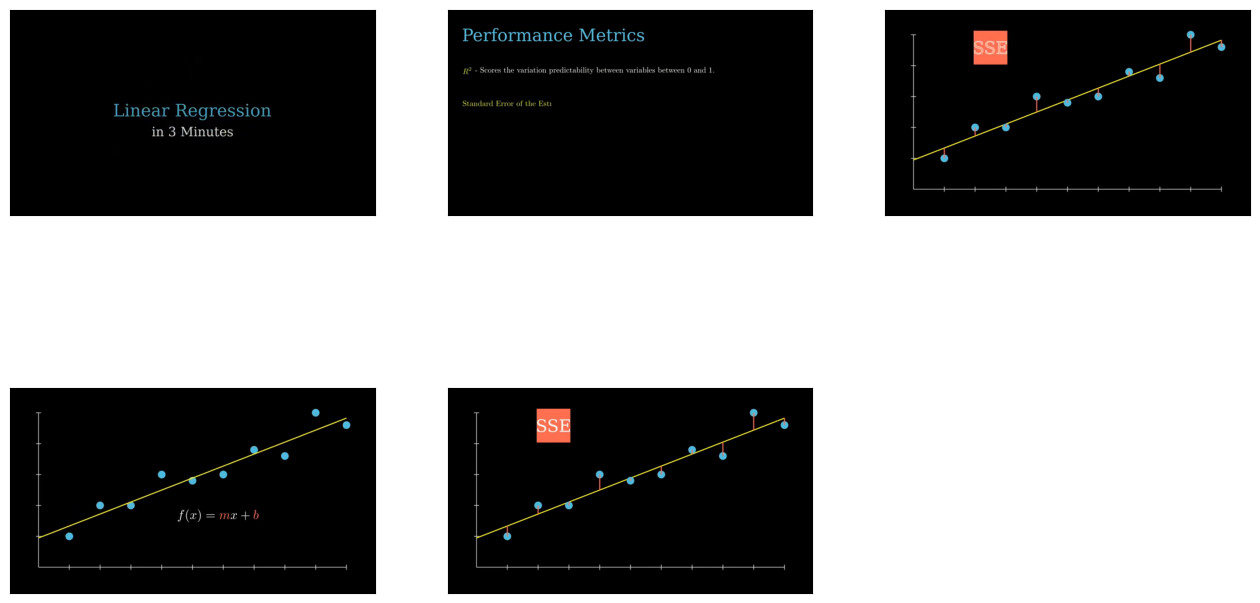

In [151]:
plot_images(img)

In [154]:
result=gemini_mm_llm.complete(
    prompt=qa_tmpl_str2.format(
        query_str=query_str,metadata_str=metadata_str
    ),
    image_documents=image_documents2,
)

pprint(result.text)

('Linear Regression is a statistical method used to predict the relationship '
 'between two or more variables. The equation for Linear Regression is: f(x) = '
 'mx + b.')


In [155]:
result2=gemini_mm_llm.complete(
    prompt="what is O'Reilly?",
    image_documents=image_documents2
)
print(result2.text)

O'Reilly is a well-known publisher of books, online learning courses, and conferences focused on technology and business. They are known for their high-quality content and their focus on emerging technologies. The video you provided is likely from an O'Reilly online learning course or conference. 



In [157]:
result3=gemini_mm_llm.complete(
    prompt="just tell me what you are seeing over the pecific ocean?",
    image_documents=image_documents2
)
pprint(result3.text)

#real time system

#sattalites

#just tell me what you are seeing over the pecific ocean?

('I am a text-based chat assistant and thus I cannot see or analyze any '
 'image. \n')
